## 합성곱 신경망의 시각화  
앞에서 합성곱 신경망을 통해 fashion mnist를 classification하는 방법에 대해 학습했다. 이번 절에서는 합성곱층이 이미지에서 어떤 것을 학습했는지  
알아보기 위해 합성곱 층의 가중치와 특성 맵의 그림으로 시각화해보자! 이를 통해 합성곱 신경망의 동작 원리에 대한 통찰을 키울 수 있다.  
지금까지는 keras의 Sequential class만 사용했다! keras는 좀 더 복잡한 모델을 만들 수 있는 함수형 API를 제공한다. 이번 절에서 함수형 API가 무엇인지  
살펴보고 합성곱 층의 특성 맵을 시각화하는데 사용해 보자!

In [1]:
import keras
model = keras.models.load_model('best-cnn-model.keras')

e:\HongongML-DL_stduy\venv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [2]:
model.layers

[<Conv2D name=conv2d, built=True>,
 <MaxPooling2D name=max_pooling2d, built=True>,
 <Conv2D name=conv2d_1, built=True>,
 <MaxPooling2D name=max_pooling2d_1, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dropout name=dropout, built=True>,
 <Dense name=dense_1, built=True>]

In [3]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape) # 합성곱에서 사용되는 kernel의 크기가 3X3이고 depth가 1이기에 3,3,1로 출력하는데 이때 kernel의 개수가 32개이기에 (3,3,1,32)가 된다!

(3, 3, 1, 32) (32,)


In [4]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.025938291 0.2769639


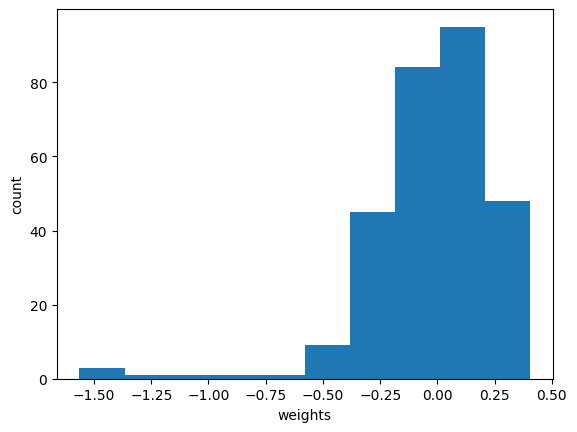

In [5]:
import matplotlib.pyplot as plt

plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weights')
plt.ylabel('count')
plt.show()

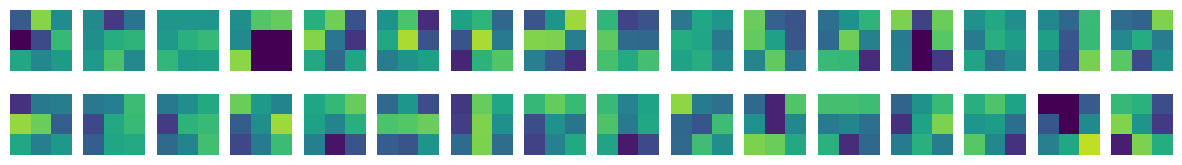

In [6]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5) # 32개의 kernel을 하나씩 꺼내서 2행 16열짜리로 만든 것이다! 이때 vmin과 vmax는 기준을 정해서 픽셀의 강도를 나타낸 것이다!
        axs[i, j].axis('off')
        
plt.show()

In [7]:
# 이번에는 훈련하지 않은 빈 합성곱 신경망을 만들어 보자! 그리고 이를 통해 훈련하지 않은 합성곱의 가중치가 위에서 본 훈련된 가중치와 어떻게 다른지 알려줘
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Input(shape=(28,28,1)))
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same'))

In [8]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [9]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

0.003799441 0.0857332


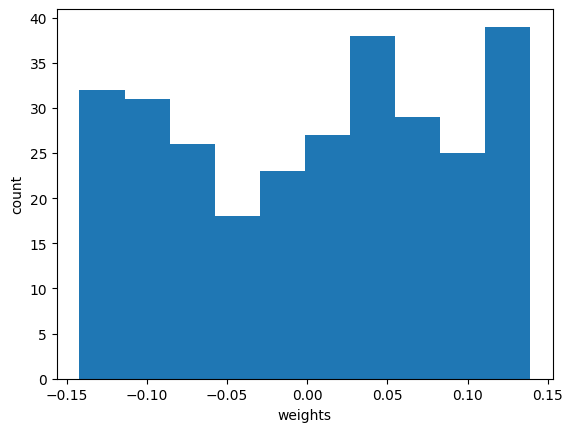

In [10]:
plt.hist(no_training_weights.reshape(-1,1))
plt.xlabel('weights')
plt.ylabel('count')
plt.show()

위 히스토그램은 훈련된 모델의 가중치와 확실히 다름!! 왜나면 케라스가 신경망의 가중치를 처음 초기화할 때 균등 분표에서  
랜덤하게 값을 선택하기 때문임! 이를 이제 위에서 한 것 처럼 matplotlib의 imshow를 이용해서 그림으로 필터를 출력해 보자!

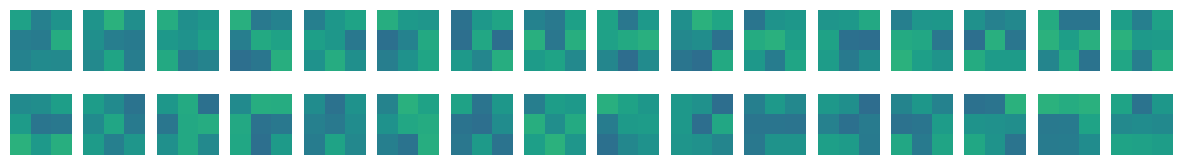

In [11]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:,:,0,i*16+j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')
        
plt.show()

확실히 훈련된 가중치보다 밋밋하게 보인다! 즉 특성(feature)를 잘 추출하지 못 할듯 하다!!

## 함수형 API  
지금까지 신경망 모델을 만들 때 keras의 Sequential 클래스를 사용했다. 이 클래스는 층을 차례대로 쌓은 모델을 만든다!  
딥러닝에서는 좀 더 복잡한 모델이 많이 있음! 예를 들어, 입력이 2개일수도 있고, 출력이 2개일 수 도 있음! 이런 경우에는
Sequential 클래스를 사용하기 어렵다. 대신 함수형 API를 사용한다! 먼저 Dense 층 2개로 이뤄진 완전 연결 신경망을 만들어 보자!

In [12]:
inputs = keras.Input(shape=(784,))
dense1 = keras.layers.Dense(100, activation='relu')
dense2 = keras.layers.Dense(10, activation='softmax')

In [13]:
hidden = dense1(inputs)

In [14]:
outputs = dense2(hidden)

In [15]:
func_model = keras.Model(inputs, outputs)

In [16]:
print(model.inputs)

[<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=False, ragged=False, name=input_layer>]


In [17]:
conv_acti = keras.Model(model.inputs, model.layers[0].output) # model 객체의 predict() 메서드를 호출하면 최종 출력층의 확률을 반환함  
# 하지만 conv_acti의 predict() 메서드를 호출하면 첫 번째 Conv2D의 출력을 반환할 것이다

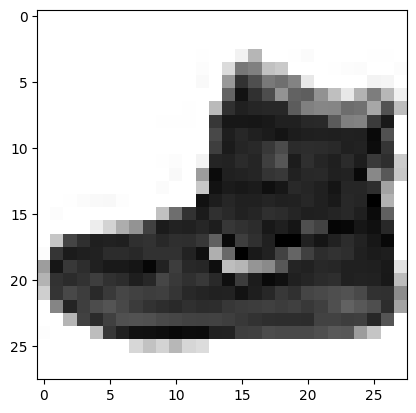

In [18]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [19]:
ankle_boot = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv_acti.predict(ankle_boot)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [20]:
print(feature_maps.shape)

(1, 28, 28, 32)


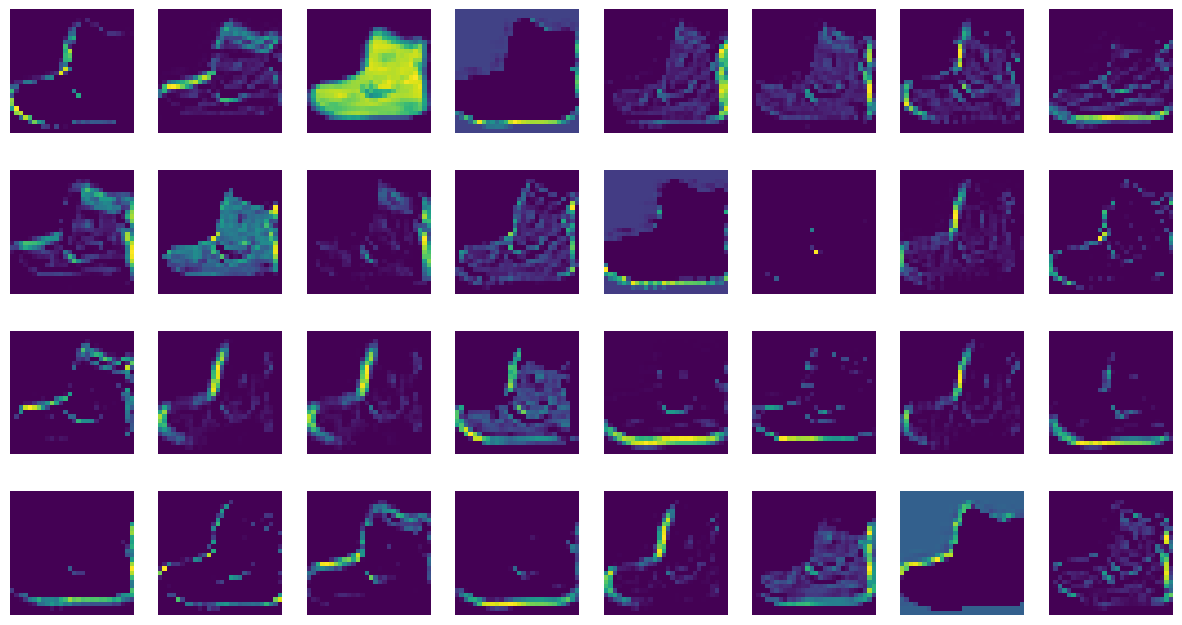

In [21]:
fig, axs = plt.subplots(4, 8, figsize=(15,8))
for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0, :, :, i*8 + j])
        axs[i, j].axis('off')
plt.show()

이 특성 맵은 32개의 필터로 인해 입력 이미지에서 강하게 활성화된 부분을 보여준다. 앞서 32개의 필터의 가중치를 출력한 그림과 몇 개를 비교해 보자!  
이 그림에서 2번째 필터는 전체적으로 밝은 색 이므로 전면이 모두 칠해진 영역을 감지함! 어떤 필터는 수직선을 감지하는 필터도 있음

In [22]:
# 이제 2번째 합성곱 층이 만든 특성 맵도 같은 방식으로 확인해보자! 
conv2_acti = keras.Model(model.inputs, model.layers[2].output)

In [23]:
feature_maps = conv2_acti.predict(ankle_boot)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


In [26]:
print(feature_maps.shape)

(1, 14, 14, 64)


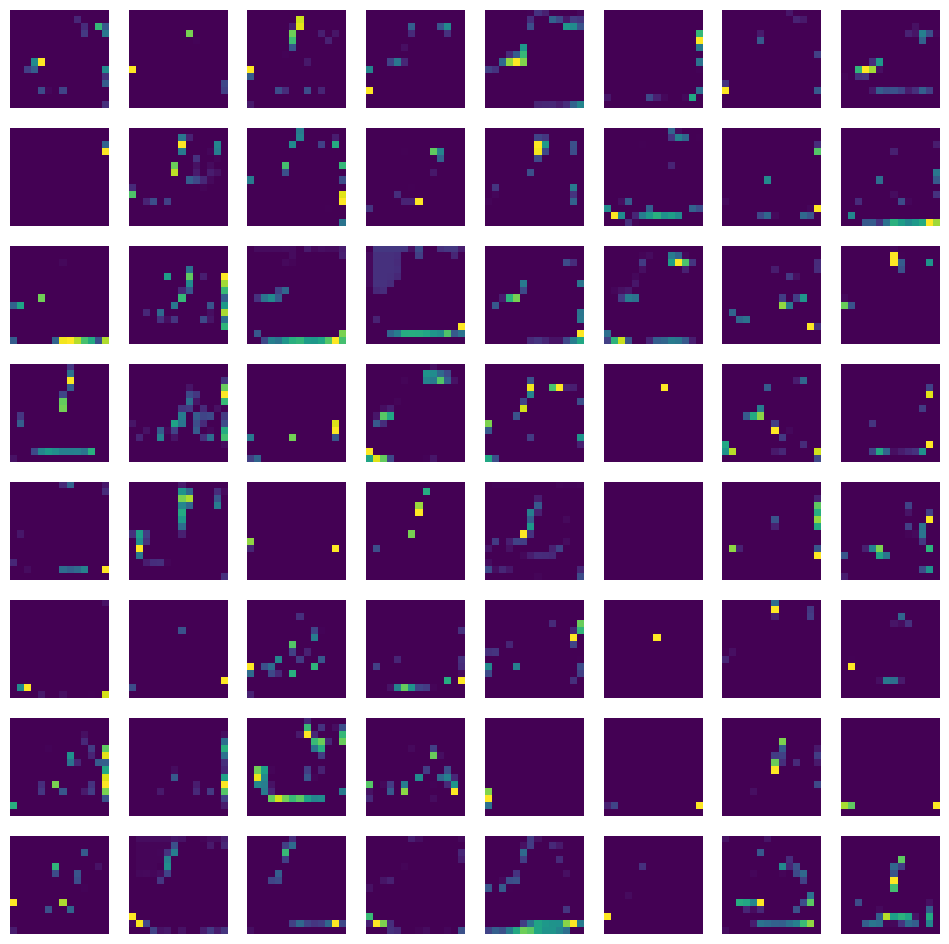

In [27]:
fig, axs = plt.subplots(8,8,figsize=(12,12))
for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8+j])
        axs[i, j].axis('off')
plt.show()